## Todos

- calculate centrality measure only once
- replace randomize_graph in basic_graph_analyzer.py by utils function

In [1]:
from src.analysis.basic_graph_analyzer import BasicGraphAnalyzer
from src.analysis.centrality_analyzer import CentralityAnalyzer
from src.analysis.scale_free_analyzer import ScaleFreeAnalyzer
from graph_tool import openmp_set_num_threads
from graph_tool.all import load_graph
import numpy as np


In [2]:
# Set the number of threads to use
openmp_set_num_threads(8)

In [3]:
main_category = 'Machine learning'
file_path = f'outputs/graphs/{main_category.replace(" ", "_")}.gt'
G = load_graph(file_path)

num_nodes = G.num_vertices()
num_edges = G.num_edges()
degrees = G.get_total_degrees(G.get_vertices())

print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")

avg_degree = np.mean(degrees)
min_degree = np.min(degrees)
max_degree = np.max(degrees)
median_degree = np.median(degrees)
    

print("\nDegree Statistics:")
print(f"Minimum degree: {min_degree}")
print(f"Maximum degree: {max_degree}")
print(f"Average degree: {avg_degree:.2f}")
print(f"Median degree: {median_degree:.2f}")

Number of nodes: 75217
Number of edges: 26149964

Degree Statistics:
Minimum degree: 2
Maximum degree: 71792
Average degree: 695.32
Median degree: 377.00


Processing vertices: 100%|██████████| 75217/75217 [02:26<00:00, 511.73vertex/s]


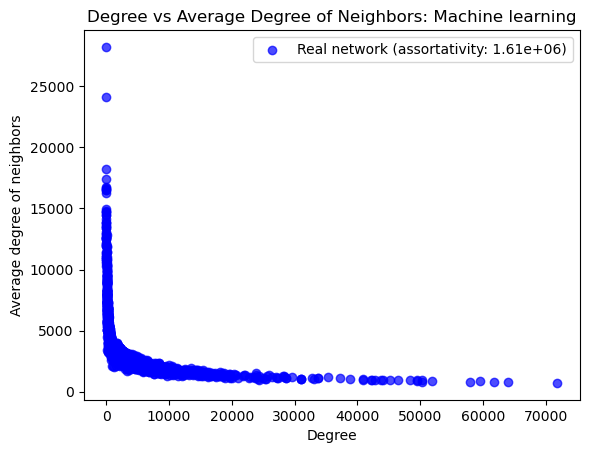

Processing vertices: 100%|██████████| 75217/75217 [02:36<00:00, 481.22vertex/s]


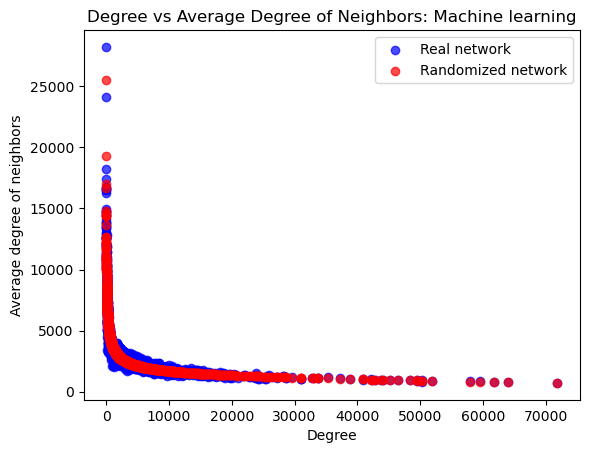

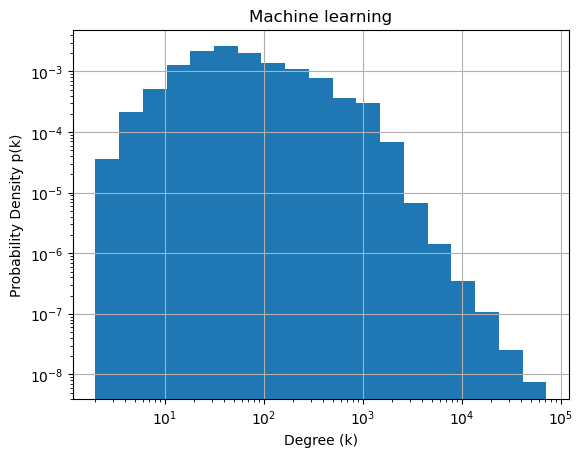

In [5]:
basic_graph_analyzer = BasicGraphAnalyzer(G)
basic_graph_analyzer.plot_degree_vs_avg_degree(f"Degree vs Average Degree of Neighbors: {main_category}", show_assortativity=False)
basic_graph_analyzer.plot_degree_vs_avg_degree(f"Degree vs Average Degree of Neighbors: {main_category}", plot_randomized=True, show_assortativity=False)
basic_graph_analyzer.plot_log_log_probability_density(main_category)

In [ ]:
# centrality_analyzer = CentralityAnalyzer(G)
# centrality_analyzer.plot_centralities()
# centrality_analyzer.plot_centralities_comparison()
# centrality_analyzer.plot_centralities_comparison_randomized()

Calculating degrees...
Degrees calculated in 0.00 seconds.

Calculating eigenvector...
Eigenvector centrality calculated in 1.55 seconds.

Calculating closeness...


Values less than or equal to 0 in data. Throwing out 0 or negative values


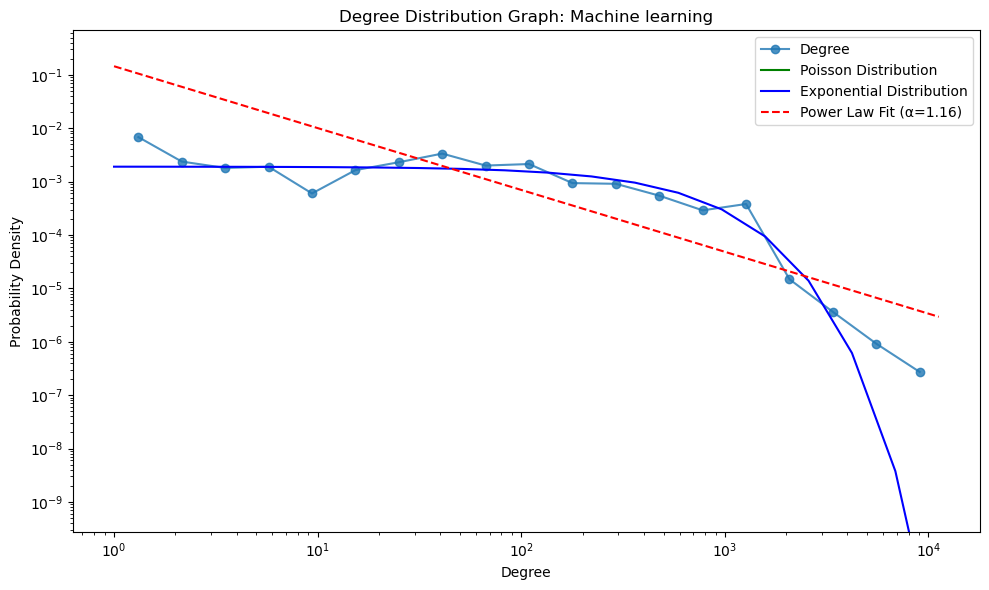


Power Law Analysis:
Minimum degree considered (xmin): 1
Number of nodes in tail: 11844
Power law exponent (α): 1.159 ± 0.001


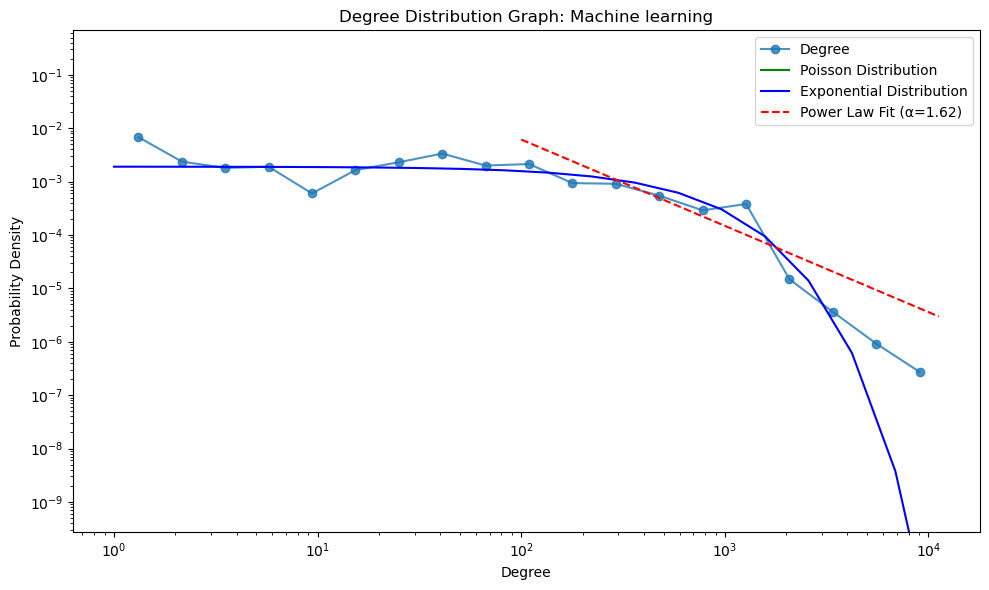


Power Law Analysis:
Minimum degree considered (xmin): 100
Number of nodes in tail: 8924
Power law exponent (α): 1.616 ± 0.007


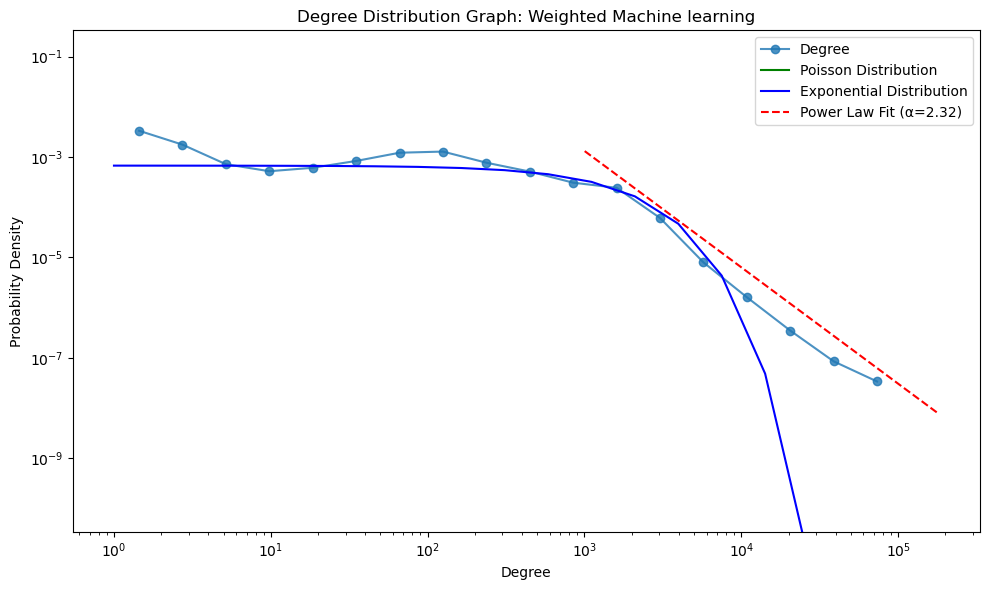


Power Law Analysis:
Minimum degree considered (xmin): 1000
Number of nodes in tail: 5158
Power law exponent (α): 2.318 ± 0.018


In [7]:
scale_free_analyzer = ScaleFreeAnalyzer(G)
scale_free_analyzer.plot_degree_distribution(main_category)

scale_free_analyzer.set_filter(10**2)
scale_free_analyzer.plot_degree_distribution(main_category)

file_path = f'outputs/graphs/{main_category.replace(" ", "_")}-weighted.gt'
G = load_graph(file_path)
scale_free_analyzer = ScaleFreeAnalyzer(G, is_weighted=True)
scale_free_analyzer.set_filter(10**3)
scale_free_analyzer.plot_degree_distribution(f'Weighted {main_category}')